The shape of the occupancy grid is: (680, 623)


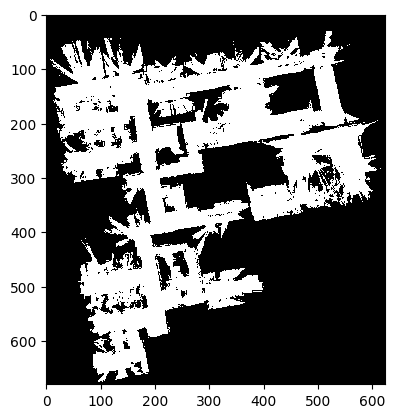

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas
occupancy_map_img = Image.open('/content/occupancy_map.png')
occupancy_grid = (np.asarray(occupancy_map_img) > 0).astype(int)
np.savetxt('test.csv', occupancy_grid, delimiter = ',')
fig = plt.figure()
plt.imshow(occupancy_grid, cmap = "gray", interpolation="none")
print(f'The shape of the occupancy grid is: {occupancy_grid.shape}')

Q1-a(1)

In [ ]:
def RecoverPath(s, g, pred):
    optimal_path = []
    current_vertex = g

    while current_vertex != s:
        optimal_path.append(current_vertex)
        current_vertex = pred[current_vertex]
    optimal_path.append(s)
    optimal_path.reverse()
    return optimal_path

Q1-a(2)

In [ ]:
import heapq

# V is the vertex, s is the s vertex and g is the g vertex, N,w,h
def A_star(V, s, g, N, w, h):
    # Initialization
    CostTo = {v: float('inf') for v in V}
    pred = {v: None for v in V}
    EstTotalCost = {v: float('inf') for v in V}

    CostTo[s] = 0
    EstTotalCost[s] = h(s, g)
    Q = [(EstTotalCost[s], s)]  # Priority queue

    # Main loop
    while Q:
        _, v = heapq.heappop(Q)  # Remove least-value element from Q


        if v == g:
            return RecoverPath(s, g, pred)  # Reconstruct and return optimal path

        for i in N(v):  # For each of v’s neighbors
            pvi = CostTo[v] + w(v, i)  # Cost of path to reach i through v

            if pvi < CostTo[i]:
                # The path to i through v is better than the previously-known best path to i,
                # so record it as the new best path to i.
                pred[i] = v #Updating pred[i]
                # print("The predecessor value is: ", pred[i])
                CostTo[i] = pvi # Updating CostTo[i]
                EstTotalCost[i] = pvi + h(i, g) # Updating EstTotalCost[i]

                if (EstTotalCost[i], i) in Q:
                    # Update i’s priority
                    Q.remove((EstTotalCost[i], i))
                    heapq.heappush(Q, (EstTotalCost[i], i))
                else:
                    # Insert i into Q with priority EstTotalCost[i]
                    heapq.heappush(Q, (EstTotalCost[i], i))

    return []  # Return empty set: there is no path to the g

Q1-b(1)

In [ ]:
def N(vertex):
    """
    Get the set of unoccupied neighbors of a vertex in an occupancy grid.

    Parameters:
    - grid (2D array): The occupancy grid map where 0 indicates occupied and 1 indicates free space.
    - vertex (tuple): The coordinates of the vertex in the form (row, column).

    Returns:
    - set: Set of unoccupied neighbors in the form of (row, column) tuples.
    """
    r, c = vertex
    neighbors = []

    # Define possible movements (up, down, left, right)
    moves = [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (-1, -1), (1, -1), (-1, 1)]

    for move in moves:
        new_row, new_col = r + move[0], c + move[1]
        if 0 <= new_row < len(occupancy_grid) and 0 <= new_col < len(occupancy_grid[0]) and occupancy_grid[new_row][new_col] == 1:
            neighbors.append((new_row, new_col))
    return neighbors

Q1-b(2)

In [ ]:
# This function returns euclidean distace between two point in 2d
import math
def distance(v1, v2):
    return math.sqrt((v1[0] - v2[0]) ** 2 + (v1[1] - v2[1]) ** 2)


Q1-b(3)

The length of the shortest path is :725


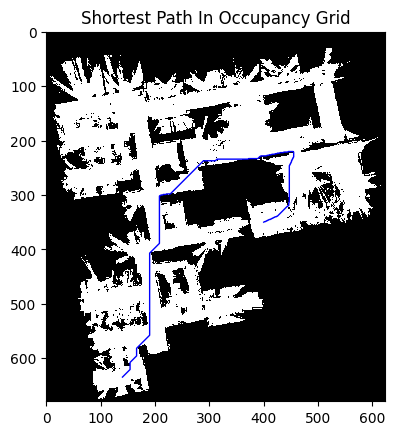

In [ ]:
s = (635, 140)
g = (350, 400)
# Get all the vetices of free space
v_set = [(i,j) for i in range(len(occupancy_grid)) for j in range(len
(occupancy_grid[i])) if occupancy_grid[i][j] == 1]
# Compute shortest path
shortest_path = A_star(v_set, s, g, N, distance, distance)
print(f'The length of the shortest path is :{len(shortest_path)}')
y = [x[0] for x in shortest_path]
x = [x[1] for x in shortest_path]
fig = plt.figure()
plt.title("Shortest Path In Occupancy Grid")
plt.imshow(occupancy_grid, cmap = 'gray', interpolation="none")
plt.plot(x, y, 'b', linewidth ='1')

Q1-c(1)

In [ ]:
# Input: Occupancy grid map "M"
# Output: Sampled vertex v(r,c), a int data-type

import random

def sample_vertex(M):
    min_x = 0
    min_y = 0
    max_x = len(M) - 1
    max_y = len(M[0]) - 1

    while True:
        sampled_vertex = (random.randint(min_x, max_x), random.randint(min_y, max_y))

        # Check if the sampled cell is unoccupied
        if M[sampled_vertex[0]][sampled_vertex[1]] == 1:
            return sampled_vertex


# # Code validation
# sample = sample_vertex(occupancy_grid)

# samples = []
# for i in range(10):
#   sample = sample_vertex(occupancy_grid)
#   print(sample)
#   samples.append(sample)

# print("The higest value of the samples is ", samples.higest)

Q1-c(2)

In [ ]:
# This fucntion performs reachability check
# Input: Occupancy grid map "M" and 2 grid cells v1 and v2
# Output: Returns a boolean value indicating if the line segment is passing through an occupied space or not

def reachability_check(v1, v2, M):

    c1, r1 = v1
    c2, r2 = v2
    points = []

    # Calculate differences and absolute differences between coordinates
    dc = abs(c2 - c1)
    dr = abs(r2 - r1)

    # Calculate the direction of the line
    sc = 1 if c1 < c2 else -1
    sr = 1 if r1 < r2 else -1

    # Initial error
    error = dc - dr

    c, r = c1, r1

    while c != c2 or r != r2:
        # Add the current point to the list of points
        points.append((c, r))

        # Calculate the next x and y values
        next_error = 2 * error
        if next_error > -dr:
            error -= dr
            c += sc
        if next_error < dc:
            error += dc
            r += sr

    # Add the last point (v2) to the list of points
    points.append((c2, r2))
    return all(M[r_p][c_p] == 1 for r_p, c_p in points)

# # Code logic validation:
# # Replace this with your actual occupancy grid map
# occupancy_grid_map = [
#   [0, 0, 1, 0, 0],
#   [0, 1, 0, 1, 0],
#   [0, 1, 1, 0, 0],
#   [0, 0, 0, 1, 0],
#   [0, 0, 0, 0, 0],
# ]

# # Example grid cell coordinates
# start_cell = (0, 1)
# end_cell = (2, 3)

# # Check if the line segment is obstacle-free
# result = reachability_check(start_cell, end_cell, occupancy_grid_map)
# print("Line segment is obstacle-free:", result)

Q1-c(3)

In [ ]:
import networkx as nx

def ConstructPRM(M, N, d_max):
    G = nx.Graph()
    V = []
    E = []
    node_count = 0
    for k in range(N):
        # Sampling a new vertex V_new that belongs to C (C is the robot configuration space)
        v_new = sample_vertex(M)
        Add_Vertex(G, v_new, d_max, M)

    return G

# Adding a vertex to the PRM graph
def Add_Vertex(G, v_new, d_max, M):
    G.add_node(v_new, pos=((v_new[1], v_new[0])))
    for node in G.nodes:
          if node != v_new and distance(node, v_new) <= d_max and reachability_check(node, v_new, occupancy_grid)#reachability check returns a boolean value if the pathis obstacle free:
              G.add_edge(node, v_new, weight=distance(node, v_new))



Q1-c(4)

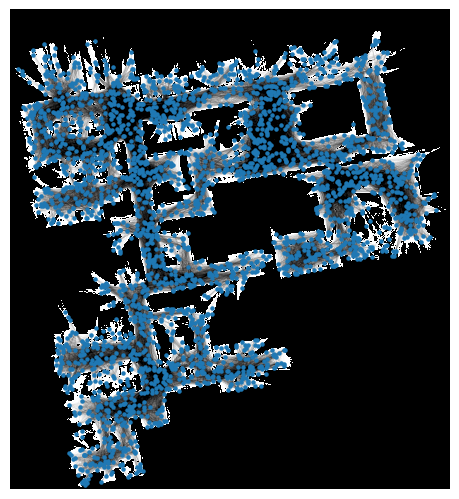

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = ConstructPRM(occupancy_grid, 2500, 75)
# Draw the PRM graph
pos = {coordinates: (value[0], value[1]) for coordinates, value in nx.get_node_attributes(G, 'pos').items()}
# pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos=pos, node_size=5, width=0.01)
plt.imshow(occupancy_grid, cmap='gray', interpolation='none')  # Show the occupancy grid
plt.show()

Q1- C(V)

In [ ]:
def RoutePlan(s, g, G):
    # Add start and goal to the graph if they're not already in it
    if s not in G:
        G.add_node('s', pos=(s[1], s[0]))
    if g not in G:
        G.add_node('g', pos=(g[1], g[0]))

    # Ensure they are connected
    num_neighbors = 5
    distance_threshold = 50

    # Connect the start node to its nearest neighbors
    for n in G.nodes:
        if n == 's' or n == 'g':
            continue
        if len(G) < num_neighbors or distance((s[1], s[0]), pos[n]) < distance_threshold:
            G.add_edge('s', n)

    # Connect the goal node to its nearest neighbors
    for n in G.nodes:
        if n == 's' or n == 'g':
            continue
        if len(G) < num_neighbors or distance((g[1], g[0]), pos[n]) < distance_threshold:
            G.add_edge('g', n)

    # Find the shortest path using A* algorithm
    path = nx.astar_path(G, 's', 'g')

    return path

The length of the shortest path is: 13


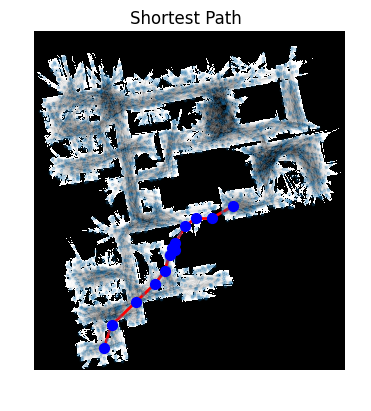

In [ ]:
# Start and goal positions
s = (635, 140)
g = (350, 400)
# copying the graph to a new variable
G_new = G.copy()
path = RoutePlan(s, g, G_new)

# Plotting the map
plt.imshow(occupancy_grid, cmap='gray', interpolation='none')

# Get positions for all nodes, including start and goal
pos = nx.get_node_attributes(G_new, 'pos')
# Draw the entire graph (lightly)
nx.draw(G_new, pos, node_size = 3, width = 0.01, alpha=0.2)
print(f'The length of the shortest path is: {len(path)}')
# Draw the path (more boldly)
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_nodes(G_new, pos, nodelist=path, node_size=50, node_color='blue')
nx.draw_networkx_edges(G_new, pos, edgelist=path_edges, width=2, edge_color='red')
# Show the plot
plt.title("Shortest Path")
plt.show()